In [1]:
import pandas as pd

In [2]:
path = 'C:/Users/trmyi/Desktop/AI_class/project/house_prediction/'
#https://data.gov.tw/dataset/137371 READ DESCRIPTIONS OF COLUMNS
df = pd.read_csv(path+'新北歷年不動產實價登錄資訊-買賣案件-109年.csv')

C:\Users\trmyi\AppData\Local\Temp\ipykernel_18992\968713635.py:3: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path+'新北歷年不動產實價登錄資訊-買賣案件-109年.csv')


In [3]:
import re

description = 'district(鄉鎮市區)、rps01(交易標的)、rps02(土地區段位置建物區段門牌)、rps03(土地移轉總面積平方公尺)、rps04(都市土地使用分區)、rps05(非都市土地使用分區)、rps06(非都市土地使用編定)、rps07(交易年月日)、rps08(交易筆棟數)、rps09(移轉層次)、rps10(總樓層數)、rps11(建物型態)、rps12(主要用途)、rps13(主要建材)、rps14(建築完成年月)、rps15(建物移轉總面積平方公尺)、rps16(建物現況格局-房)、rps17(建物現況格局-廳)、rps18(建物現況格局-衛)、rps19(建物現況格局-隔間)、rps20(有無管理組織)、rps21(總價元)、rps22(單價元平方公尺)、rps23(車位類別)、rps24(車位移轉總面積平方公尺)、rps25(車位總價元)、rps26(備註)、rps27(編號)、rps28(主建物面積)、rps29(附屬建物面積)、rps30(陽台面積)、rps31(電梯)'
d_split = description.split('、')

d_list = []

for i in d_split:
    d_list.append(re.search(r'\((.*?)\)',i).group(1))
    
des1 = list(df.columns)

df1 = df.rename(columns={i:j for i,j in zip(des1,d_list)})

In [5]:
df1.columns

Index(['鄉鎮市區', '交易標的', '土地區段位置建物區段門牌', '土地移轉總面積平方公尺', '都市土地使用分區', '非都市土地使用分區',
       '非都市土地使用編定', '交易年月日', '交易筆棟數', '移轉層次', '總樓層數', '建物型態', '主要用途', '主要建材',
       '建築完成年月', '建物移轉總面積平方公尺', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛',
       '建物現況格局-隔間', '有無管理組織', '總價元', '單價元平方公尺', '車位類別', '車位移轉總面積平方公尺', '車位總價元',
       '備註', '編號', '主建物面積', '附屬建物面積', '陽台面積', '電梯'],
      dtype='object')

In [7]:
col_to_delete_1 = ['土地區段位置建物區段門牌','交易年月日','交易筆棟數','移轉層次','總樓層數','建築完成年月','建物現況格局-隔間',
                   '單價元平方公尺', '車位類別', '車位移轉總面積平方公尺', '車位總價元',
                   '備註', '編號', '主建物面積', '附屬建物面積', '陽台面積', '電梯']
                   

In [8]:
df2 = df1.drop(columns=col_to_delete_1)
len(df2.columns)

15

In [9]:
df2.columns

Index(['鄉鎮市區', '交易標的', '土地移轉總面積平方公尺', '都市土地使用分區', '非都市土地使用分區', '非都市土地使用編定',
       '建物型態', '主要用途', '主要建材', '建物移轉總面積平方公尺', '建物現況格局-房', '建物現況格局-廳',
       '建物現況格局-衛', '有無管理組織', '總價元'],
      dtype='object')

In [10]:
des2 = list(df2.columns)
eng_des = ['District','Product_type','L_area','CityLandUsageType','NonCityLandUsageType',
             'NonCityLandUsage編定','PropertyType','MainUsage','MainMaterial',
            'B_area','Rooms','LivingR','BathR', 'Management','Price']
len(eng_des)

15

In [11]:
df3 = df2.rename(columns={i:j for i,j in zip(des2,eng_des)})

In [12]:
df4 = df3[~((df3['Product_type'] == '車位') | (df3['Product_type'] == '土地'))]

In [14]:
df5 = df4[df4['MainUsage'] == '住家用']

In [15]:
df5['CityLandUsageType'] = df5['CityLandUsageType'].apply(lambda x: str(x))
df5['CityLandUsageType'] = df5['CityLandUsageType'].apply(lambda x: '住' if '住' in x else 'other')

C:\Users\trmyi\AppData\Local\Temp\ipykernel_18992\3964206384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['CityLandUsageType'] = df5['CityLandUsageType'].apply(lambda x: str(x))
C:\Users\trmyi\AppData\Local\Temp\ipykernel_18992\3964206384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['CityLandUsageType'] = df5['CityLandUsageType'].apply(lambda x: '住' if '住' in x else 'other')


In [16]:
df5['CityLandUsageType'].value_counts()

住        18886
other    10148
Name: CityLandUsageType, dtype: int64

In [17]:
df6 = df5[df5['CityLandUsageType'] == '住']

In [18]:
df6['PropertyType'] = df6['PropertyType'].apply(lambda x: x.split('(')[0])

C:\Users\trmyi\AppData\Local\Temp\ipykernel_18992\1562766474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['PropertyType'] = df6['PropertyType'].apply(lambda x: x.split('(')[0])


In [20]:
 df6['PropertyType'] = df6['PropertyType'].apply(lambda x: 'other' if x in ['店面','其他','辦公商業大樓','工廠','倉庫'] else x)

C:\Users\trmyi\AppData\Local\Temp\ipykernel_18992\2106719230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['PropertyType'] = df6['PropertyType'].apply(lambda x: 'other' if x in ['店面','其他','辦公商業大樓','工廠','倉庫'] else x)


In [21]:
 df7 = df6[~(df6['PropertyType'] == 'other')]

In [22]:
materials_under_10 = df7['MainMaterial'].value_counts()[df7['MainMaterial'].value_counts()<10]

In [23]:
df7['MainMaterial'] = df7['MainMaterial'].apply(lambda x: 'other' if x in materials_under_10 else x)

C:\Users\trmyi\AppData\Local\Temp\ipykernel_18992\972740512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['MainMaterial'] = df7['MainMaterial'].apply(lambda x: 'other' if x in materials_under_10 else x)


In [24]:
 df8 = df7.drop(df7[df7['MainMaterial'] == 'other'].index)

In [25]:
df8['Management'] = df8["Management"].replace({"有": 1 ,"無": 0})

In [28]:
cols_to_del_2 = ['Product_type','CityLandUsageType','NonCityLandUsageType','NonCityLandUsage編定','MainUsage']

In [29]:
df9 = df8.drop(columns=cols_to_del_2)

In [32]:
df9.columns

Index(['District', 'L_area', 'PropertyType', 'MainMaterial', 'B_area', 'Rooms',
       'LivingR', 'BathR', 'Management', 'Price'],
      dtype='object')

In [33]:
# look at numeric and categorical values separately 
df9_num = df9[['L_area','B_area','Rooms','LivingR','BathR','Price']]
df9_cat = df9[['District','PropertyType','MainMaterial','Management']]

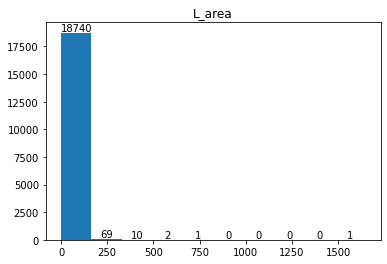

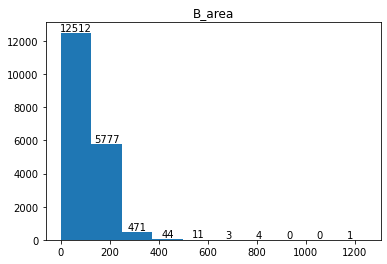

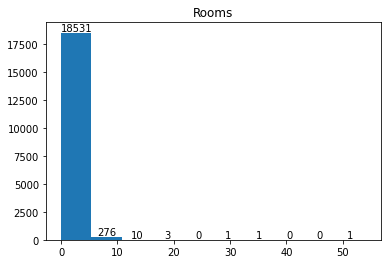

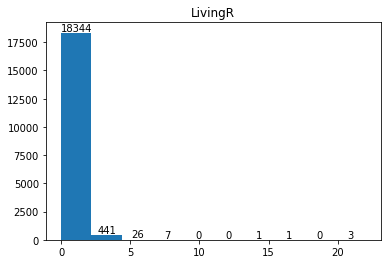

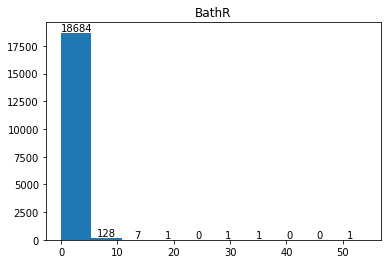

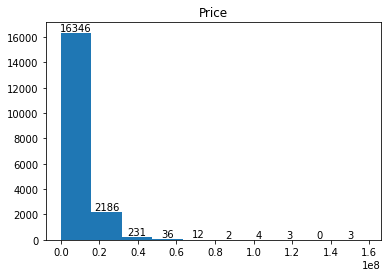

In [34]:
import matplotlib.pyplot as plt

for i in df9_num.columns:
    counts, edges, bars = plt.hist(df9_num[i])
    plt.bar_label(bars)
    plt.title(i)
    plt.show()

In [52]:
#remove extreme value datas
df10 = df9[~((df9['L_area']>500) | (df9['B_area']>500))]

In [61]:
df11 = df10[ ~((df10['Rooms'] > 8)  | (df10['LivingR'] > 4) | (df10['BathR'] > 8)  )]

c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26495 (\N{CJK UNIFIED IDEOGRAPH-677F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27211 (\N{CJK UNIFIED IDEOGRAPH-6A4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21312 (\N{CJK UNIFIED IDEOGRAPH-5340}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22303 (\N{CJK UNIFIED IDEOGRAPH-571F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\sit

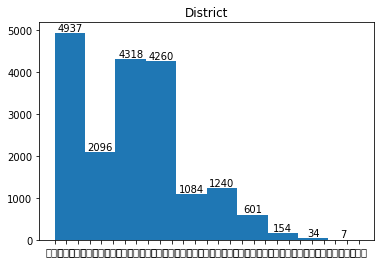

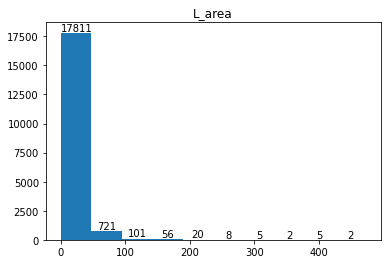

c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20303 (\N{CJK UNIFIED IDEOGRAPH-4F4F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23429 (\N{CJK UNIFIED IDEOGRAPH-5B85}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27155 (\N{CJK UNIFIED IDEOGRAPH-6A13}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\sit

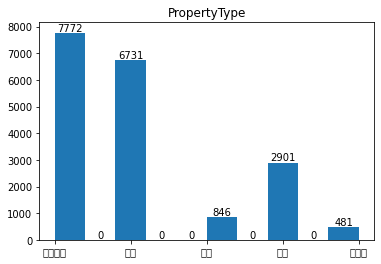

c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37628 (\N{CJK UNIFIED IDEOGRAPH-92FC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31563 (\N{CJK UNIFIED IDEOGRAPH-7B4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20957 (\N{CJK UNIFIED IDEOGRAPH-51DD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\trmyi\desktop\ai_class\project\house_prediction\lib\sit

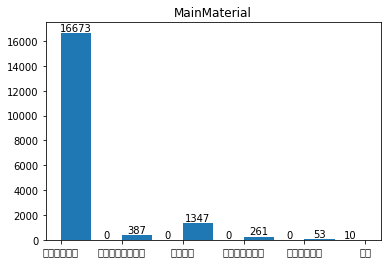

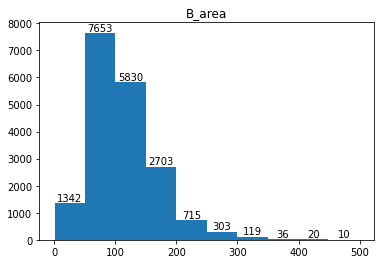

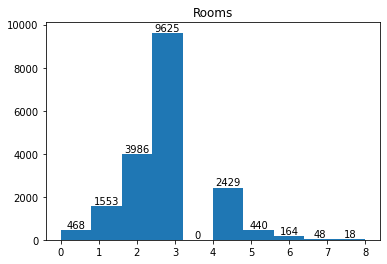

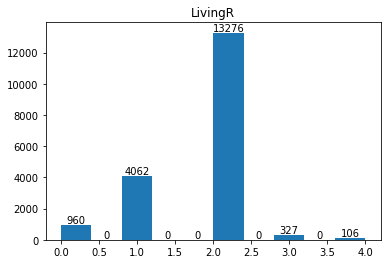

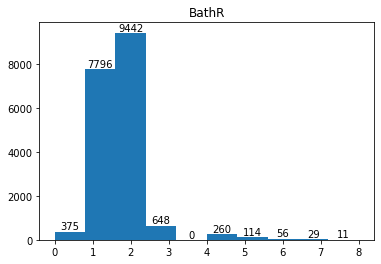

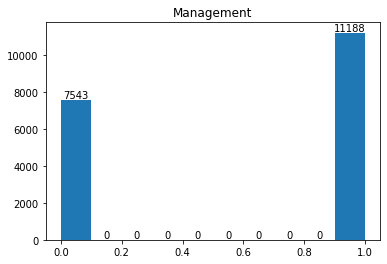

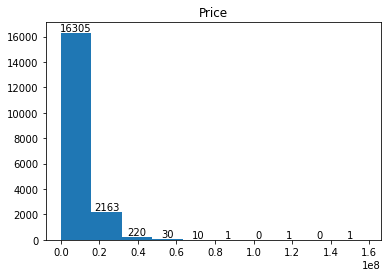

In [62]:
for i in df11.columns:
    counts, edges, bars = plt.hist(df11[i])
    plt.bar_label(bars)
    plt.title(i)
    plt.show()

In [66]:
df12 = df11 [df11['Price'] < 60000000]

In [67]:
df12.columns

Index(['District', 'L_area', 'PropertyType', 'MainMaterial', 'B_area', 'Rooms',
       'LivingR', 'BathR', 'Management', 'Price'],
      dtype='object')

In [68]:
import warnings
warnings.filterwarnings('ignore')

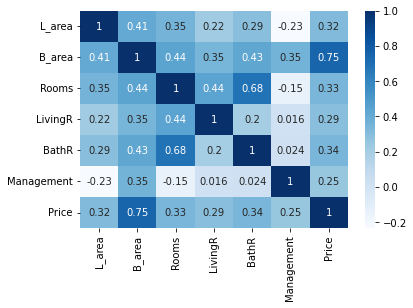

In [70]:
import seaborn as sns


sns.heatmap(df12.corr(),annot=True, cmap="Blues")
plt.show()

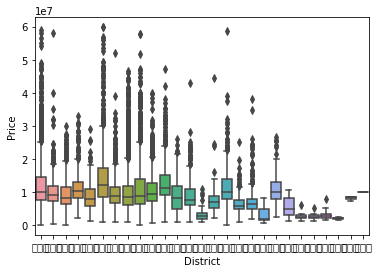

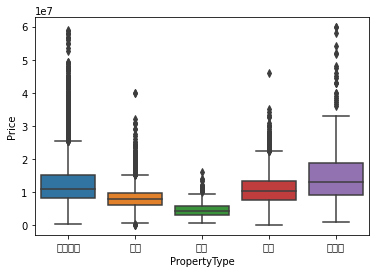

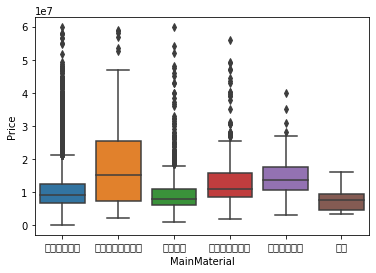

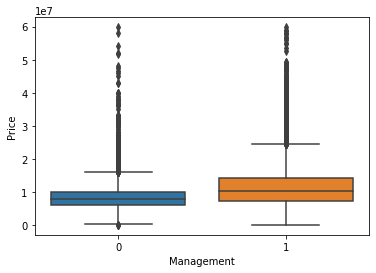

In [78]:
for i in df12[['District','PropertyType','MainMaterial','Management' ]]:
    sns.boxplot(x=i, y="Price", data=df12[['Price',i]])
    plt.show()

In [79]:
dummies_District = pd.get_dummies(df12.District)
dummies_PropertyType = pd.get_dummies(df12.PropertyType)
dummies_MainMaterial = pd.get_dummies(df12.MainMaterial)
dummies = pd.concat([dummies_District, dummies_PropertyType,dummies_MainMaterial],axis=1)

In [90]:
df13 = pd.concat([df12.drop(['District','PropertyType','MainMaterial'],axis =1),dummies],axis='columns')

In [91]:
df14 = df13.copy()

In [92]:
import numpy as np

df14['Price'] = np.log(df14['Price'])
df14['B_area'] = np.log(df14['B_area'])

In [109]:
df_train = df14

In [110]:
X = df_train.drop(['Price'],axis='columns')
X.head(3)

,L_area,B_area,Rooms,LivingR,BathR,Management,三峽區,三芝區,三重區,中和區,...,公寓,套房,華廈,透天厝,加強磚造,磚造,見其他登記事項,鋼筋混凝土造,鋼骨混凝土造,鋼骨鋼筋混凝土造
0,7.15,4.900597,3.0,2.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28.85,5.047481,2.0,2.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,17.25,4.072440,0.0,0.0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [111]:
y = df_train.Price

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [113]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.803532417247164

In [114]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.80353242, 0.79850797, 0.79008861, 0.80757208, 0.79250706])

In [115]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Predicting R2 Score the Train set results
y_pred_linear_train = lr_clf.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = lr_clf.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))

print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

R2_score (train):  0.7896909769665541
R2_score (test):  0.803532417247164
RMSE:  0.24209042997871355


In [ ]:
import pickle
with open('home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))